# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy


# locate file
output_file = "output_data/cities.csv"

# rang of latitudes and longitudes

lat_range = (-90, 90)
lon_range = (-180, 180)

## Generate Cities List

In [3]:
# list
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)        

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# store values
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : tuktoyaktuk
City not found. Skipping...
Processing Record 2 of Set 1 : yulara
Processing Record 3 of Set 1 : hilo
Processing Record 4 of Set 1 : sinnamary
Processing Record 5 of Set 1 : new norfolk
Processing Record 6 of Set 1 : hermanus
Processing Record 7 of Set 1 : shu
Processing Record 8 of Set 1 : cap-aux-meules
Processing Record 9 of Set 1 : adrar
Processing Record 10 of Set 1 : mataura
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : bluff
Processing Record 13 of Set 1 : busselton
Processing Record 14 of Set 1 : tasiilaq
Processing Record 15 of Set 1 : puga
Processing Record 16 of Set 1 : nikolskoye
Processing Record 17 of Set 1 : grand gaube
Processing Record 18 of Set 1 : aleksandrovsk-sakhalinskiy
Processing Record 19 of Set 1 : port alfred
Processing Record 20 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 21 of Set 1 : ushuaia
Processing Recor

Processing Record 30 of Set 4 : palmares do sul
Processing Record 31 of Set 4 : tucurui
Processing Record 32 of Set 4 : caravelas
Processing Record 33 of Set 4 : shirgaon
Processing Record 34 of Set 4 : victoria
Processing Record 35 of Set 4 : margate
Processing Record 36 of Set 4 : oranjemund
Processing Record 37 of Set 4 : zherdevka
Processing Record 38 of Set 4 : sorgun
Processing Record 39 of Set 4 : ayan
Processing Record 40 of Set 4 : kaitangata
Processing Record 41 of Set 4 : necochea
Processing Record 42 of Set 4 : saint-francois
Processing Record 43 of Set 4 : bredasdorp
Processing Record 44 of Set 4 : qandala
Processing Record 45 of Set 4 : krasnoselkup
Processing Record 46 of Set 4 : novyy urengoy
Processing Record 47 of Set 4 : tupelo
Processing Record 48 of Set 4 : lima
Processing Record 49 of Set 4 : varhaug
City not found. Skipping...
Processing Record 50 of Set 4 : sembakung
Processing Record 0 of Set 5 : doume
Processing Record 1 of Set 5 : baghmara
Processing Record 2

Processing Record 19 of Set 8 : todiresti
Processing Record 20 of Set 8 : ouargaye
Processing Record 21 of Set 8 : sungaipenuh
Processing Record 22 of Set 8 : ca mau
City not found. Skipping...
Processing Record 23 of Set 8 : zhicheng
Processing Record 24 of Set 8 : kloulklubed
Processing Record 25 of Set 8 : west wendover
Processing Record 26 of Set 8 : kirovskiy
Processing Record 27 of Set 8 : veshenskaya
Processing Record 28 of Set 8 : tyret pervaya
Processing Record 29 of Set 8 : inhambane
Processing Record 30 of Set 8 : bow island
Processing Record 31 of Set 8 : baijiantan
Processing Record 32 of Set 8 : roanoke rapids
Processing Record 33 of Set 8 : aswan
City not found. Skipping...
Processing Record 34 of Set 8 : inuvik
Processing Record 35 of Set 8 : gizo
Processing Record 36 of Set 8 : sept-iles
Processing Record 37 of Set 8 : san patricio
Processing Record 38 of Set 8 : buin
Processing Record 39 of Set 8 : kemin
Processing Record 40 of Set 8 : ende
Processing Record 41 of Set

Processing Record 2 of Set 12 : sal rei
Processing Record 3 of Set 12 : odweyne
Processing Record 4 of Set 12 : itoman
Processing Record 5 of Set 12 : taltal
Processing Record 6 of Set 12 : adwa
Processing Record 7 of Set 12 : klichka
Processing Record 8 of Set 12 : aginskoye
Processing Record 9 of Set 12 : urumqi
Processing Record 10 of Set 12 : yatou
Processing Record 11 of Set 12 : chumphon
Processing Record 12 of Set 12 : mogok
Processing Record 13 of Set 12 : marabba
Processing Record 14 of Set 12 : safaga
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# DataFram
weather_df = pd.DataFrame({"City" : city_name_list,
                           "Lat" : lat_list, "Lng" : lng_list, "Max Temp" : max_temp_list,
                           "Humidity" : humidity_list, "Cloudiness" : cloudiness_list,
                           "Wind Speed" : wind_speed_list, "Country" : country_list,
                           "Date" : date_list})

weather_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
weather_df.head(-1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,12.00,71,75,3.60,CA,1627424896
1,Yulara,-25.2406,130.9889,14.91,55,90,0.00,AU,1627425106
2,Hilo,19.7297,-155.0900,26.85,83,90,4.12,US,1627425106
3,Sinnamary,5.3833,-52.9500,26.33,80,11,4.09,GF,1627424939
4,New Norfolk,-42.7826,147.0587,12.72,74,93,3.54,AU,1627425107
...,...,...,...,...,...,...,...,...,...
569,Ürümqi,43.8010,87.6005,25.53,28,0,3.00,CN,1627425255
570,Yatou,37.1500,122.3833,26.80,73,92,2.63,CN,1627425256
571,Chumphon,10.3333,98.8333,23.49,91,84,3.84,TH,1627425256
572,Mogok,22.9167,96.5000,18.42,98,100,0.87,MM,1627425256


In [8]:
# Save city data into a csv file
weather_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
test_stats = weather_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    575.000000
mean      72.859130
std       19.494107
min        1.000000
25%       64.000000
50%       77.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

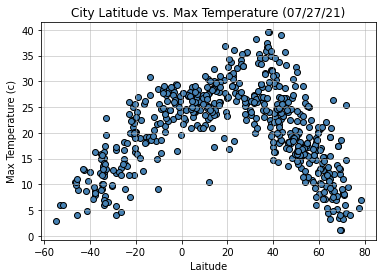

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (c)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

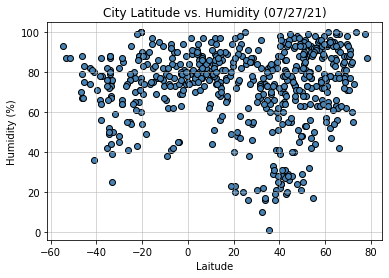

In [13]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

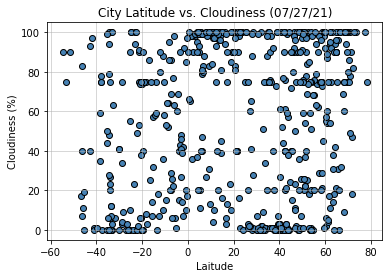

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

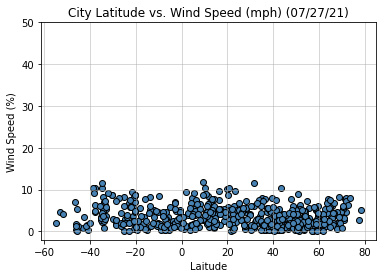

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (mph) (07/27/21)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.65


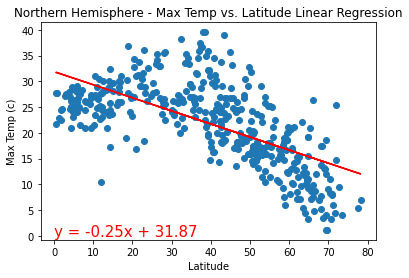

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (c)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


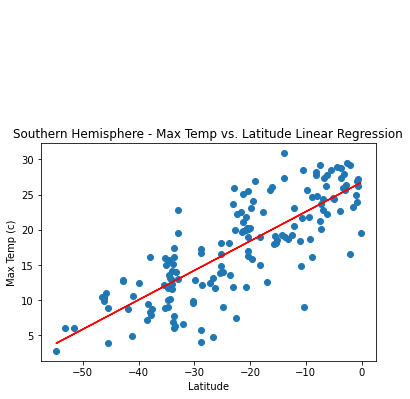

In [18]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (c)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01


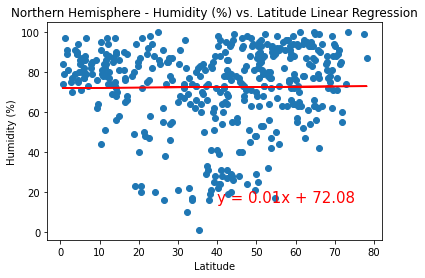

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


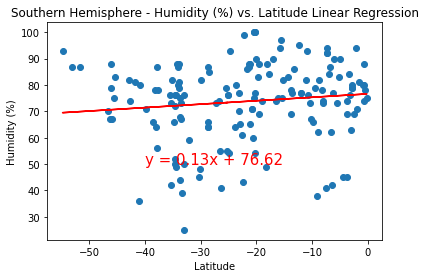

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.08


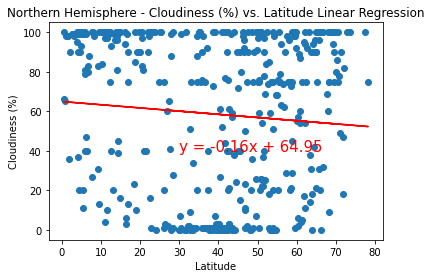

In [21]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


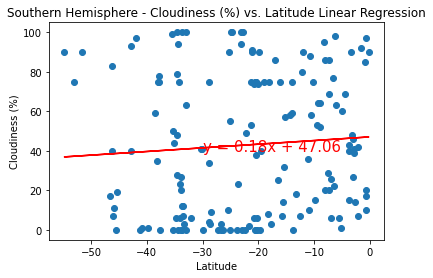

In [22]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.13


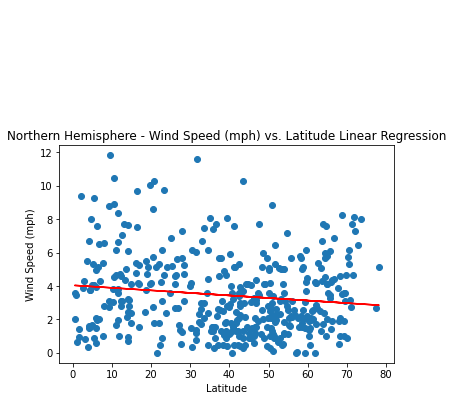

In [23]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.21


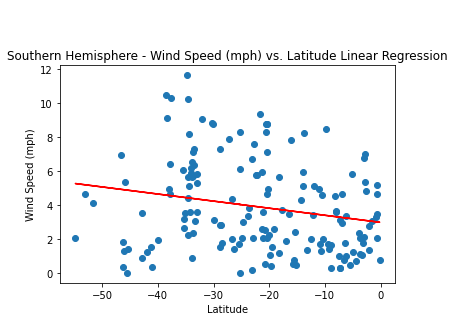

In [24]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
